In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'time (ns)')

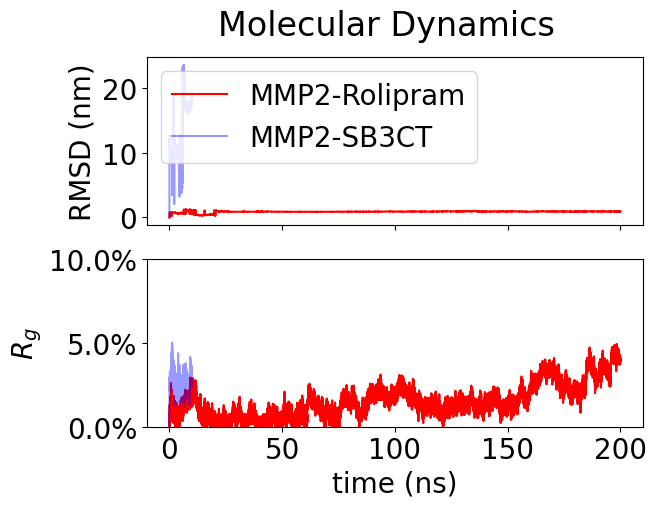

In [12]:
import matplotlib
import matplotlib.ticker as mtick
matplotlib.rc('font', size=20)
fs = 14

mmp2rol_rmsfname = "MMP2_Rolipram/post-processing/Complex/md_rmsd.xvg"
mmp2rol_gyrate = "MMP2_Rolipram/post-processing/Complex/md_gyrate.xvg"

mmp2sb3ct_rmsfname = "MMP2_sb3ct/post-processing/Complex/rmsd_10ns.xvg"
mmp2sb3ct_gyrate = "MMP2_sb3ct/post-processing/Complex/md_gyrate.xvg"

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.suptitle('Molecular Dynamics')


t1, rms = np.loadtxt(mmp2rol_rmsfname, comments=['#','@'], unpack=True)
ax1.plot(t1,rms, color="red", label="MMP2-Rolipram")

t1, rms = np.loadtxt(mmp2sb3ct_rmsfname, comments=['#','@'], unpack=True)
ax1.plot(t1,rms, color="blue", label="MMP2-SB3CT", alpha=0.4)


ax1.set_ylabel("RMSD (nm)")
ax1.legend(loc='upper left')


t3,rg, rgx, rgy, rgz = np.loadtxt(mmp2rol_gyrate, comments=['#','@'], unpack=True)
ax2.plot(t3/1000, 100 * np.abs(rg-rg[0])/rg[0], label=r"$R_g$", color='red')

t3,rg, rgx, rgy, rgz = np.loadtxt(mmp2sb3ct_gyrate, comments=['#','@'], unpack=True)
ax2.plot(t3/1000, 100 * np.abs(rg-rg[0])/rg[0], label=r"$R_g$", color='blue', alpha=0.4)

ax2.set_ylabel(r"$R_g$")
ax2.set_ylim((0.0, 10.0))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_xlabel("time (ns)")

In [10]:
rms[0],np.max(rms)

(0.0005001, 1.2437238)

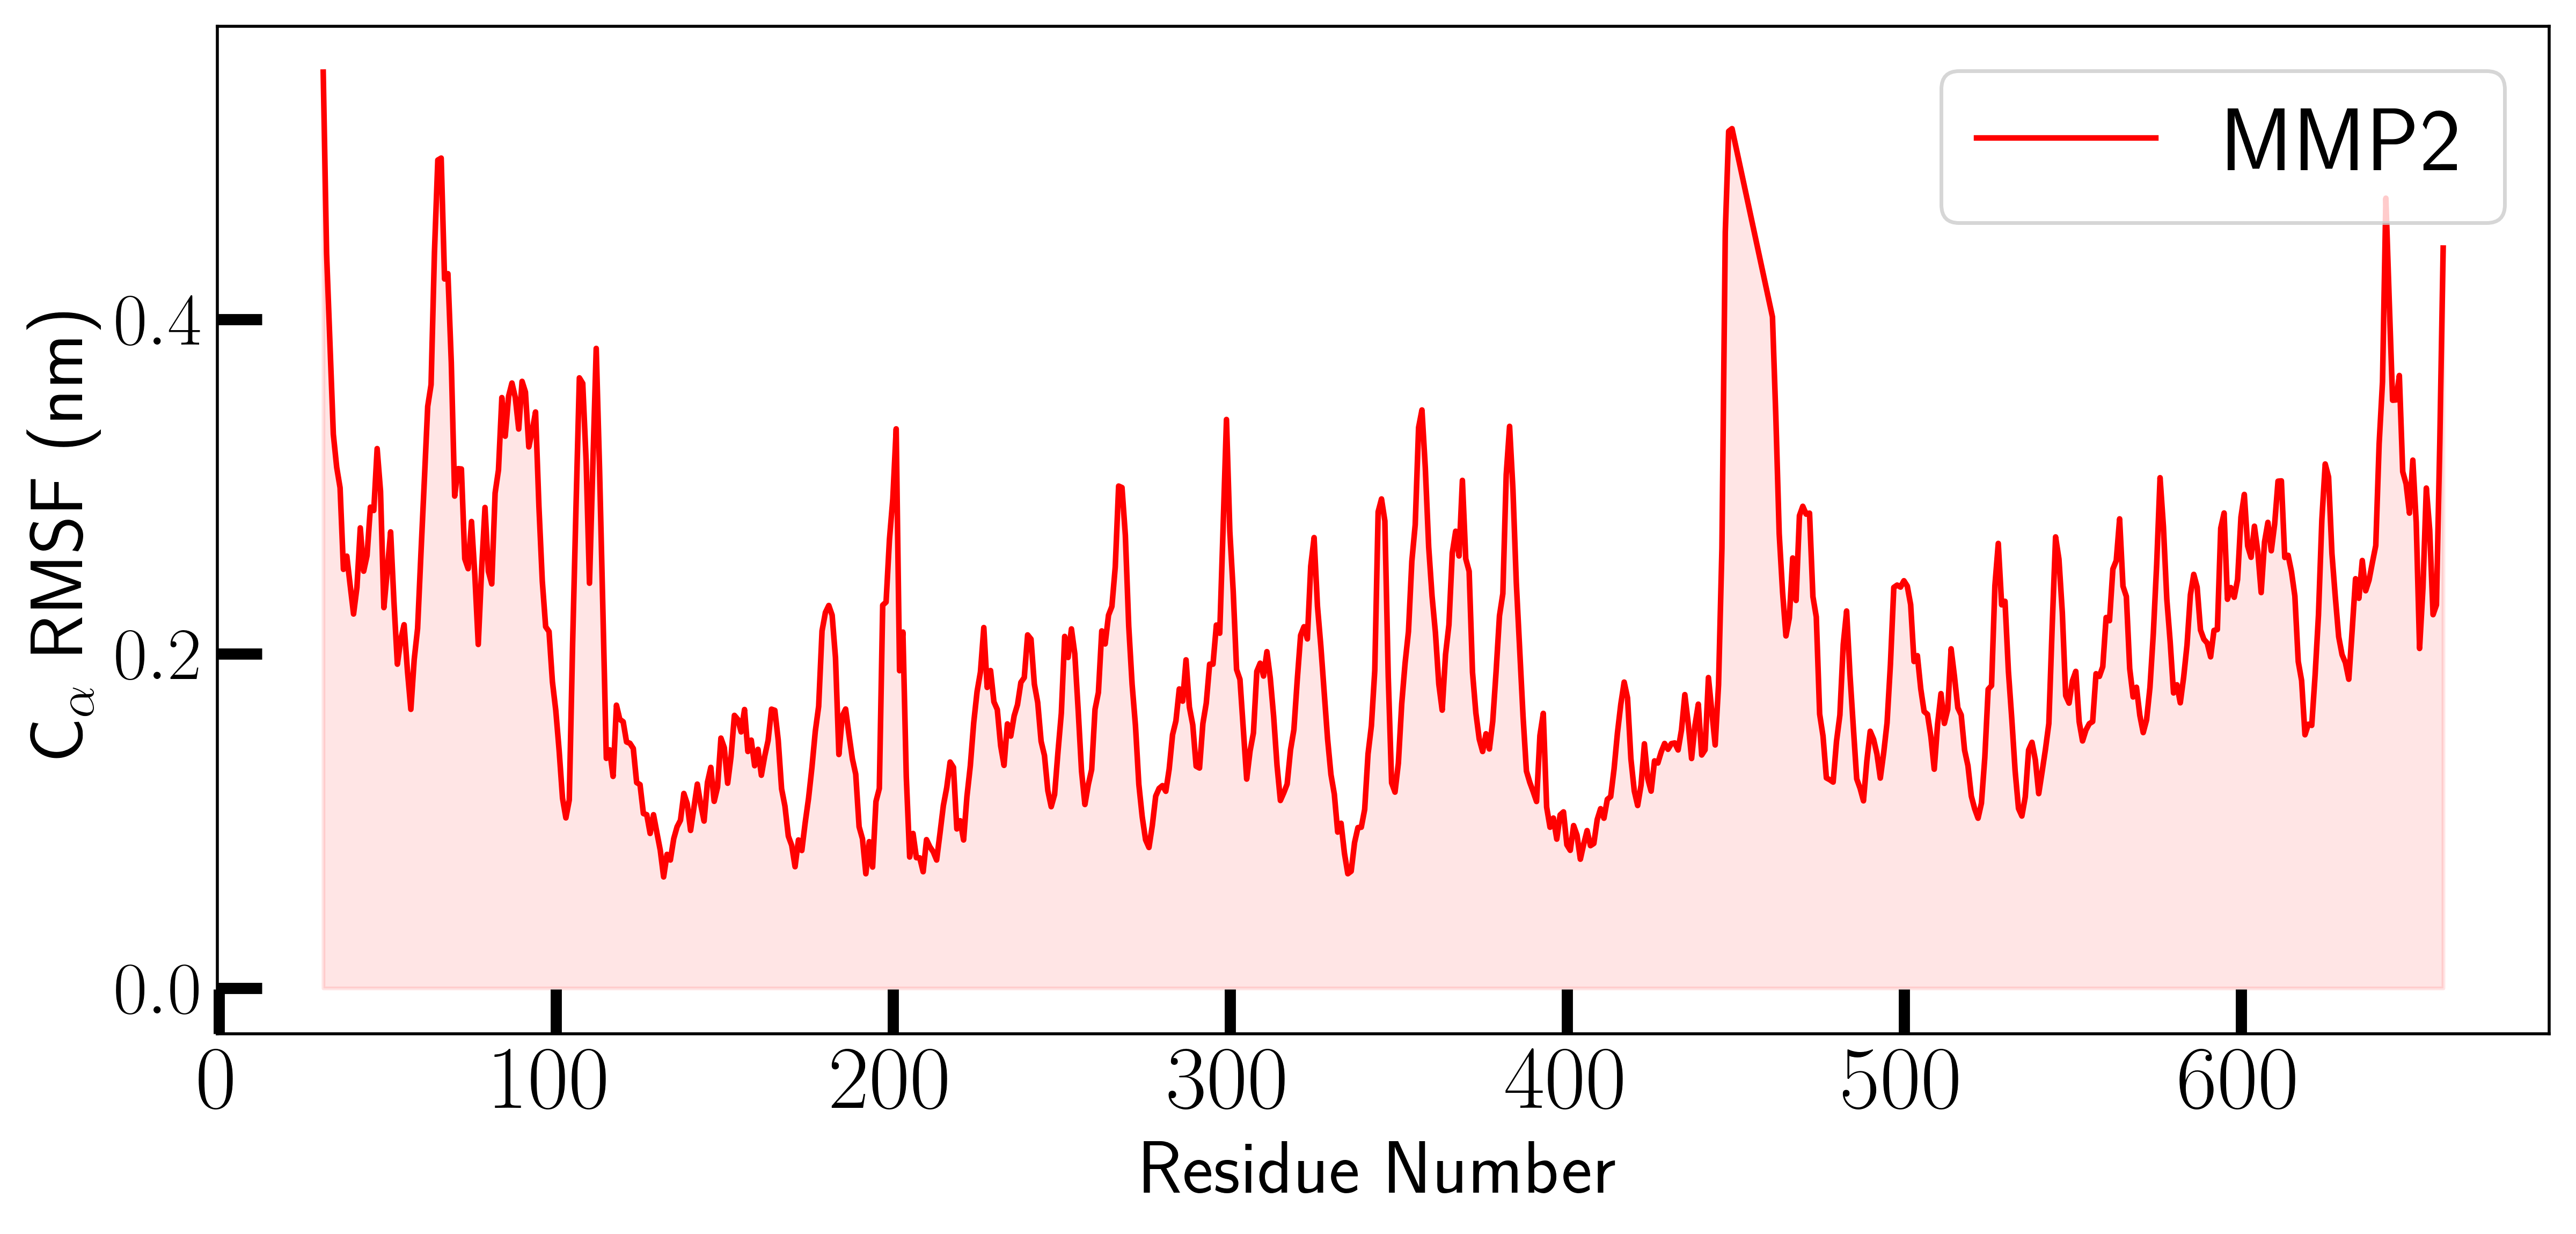

In [8]:
import matplotlib.pyplot as plt
import numpy as np

res,rmsf = np.loadtxt("MMP2/rmsf_longer.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.fill_between(res,rmsf, color="red", linestyle="-", alpha=0.1)

ax.plot(res,rmsf, color="red", linestyle="-", label="MMP2")
ax.set_xlabel("Residue Number")
ax.set_ylabel(r"C$_\alpha$ RMSF (nm)")
ax.legend(loc="upper right")

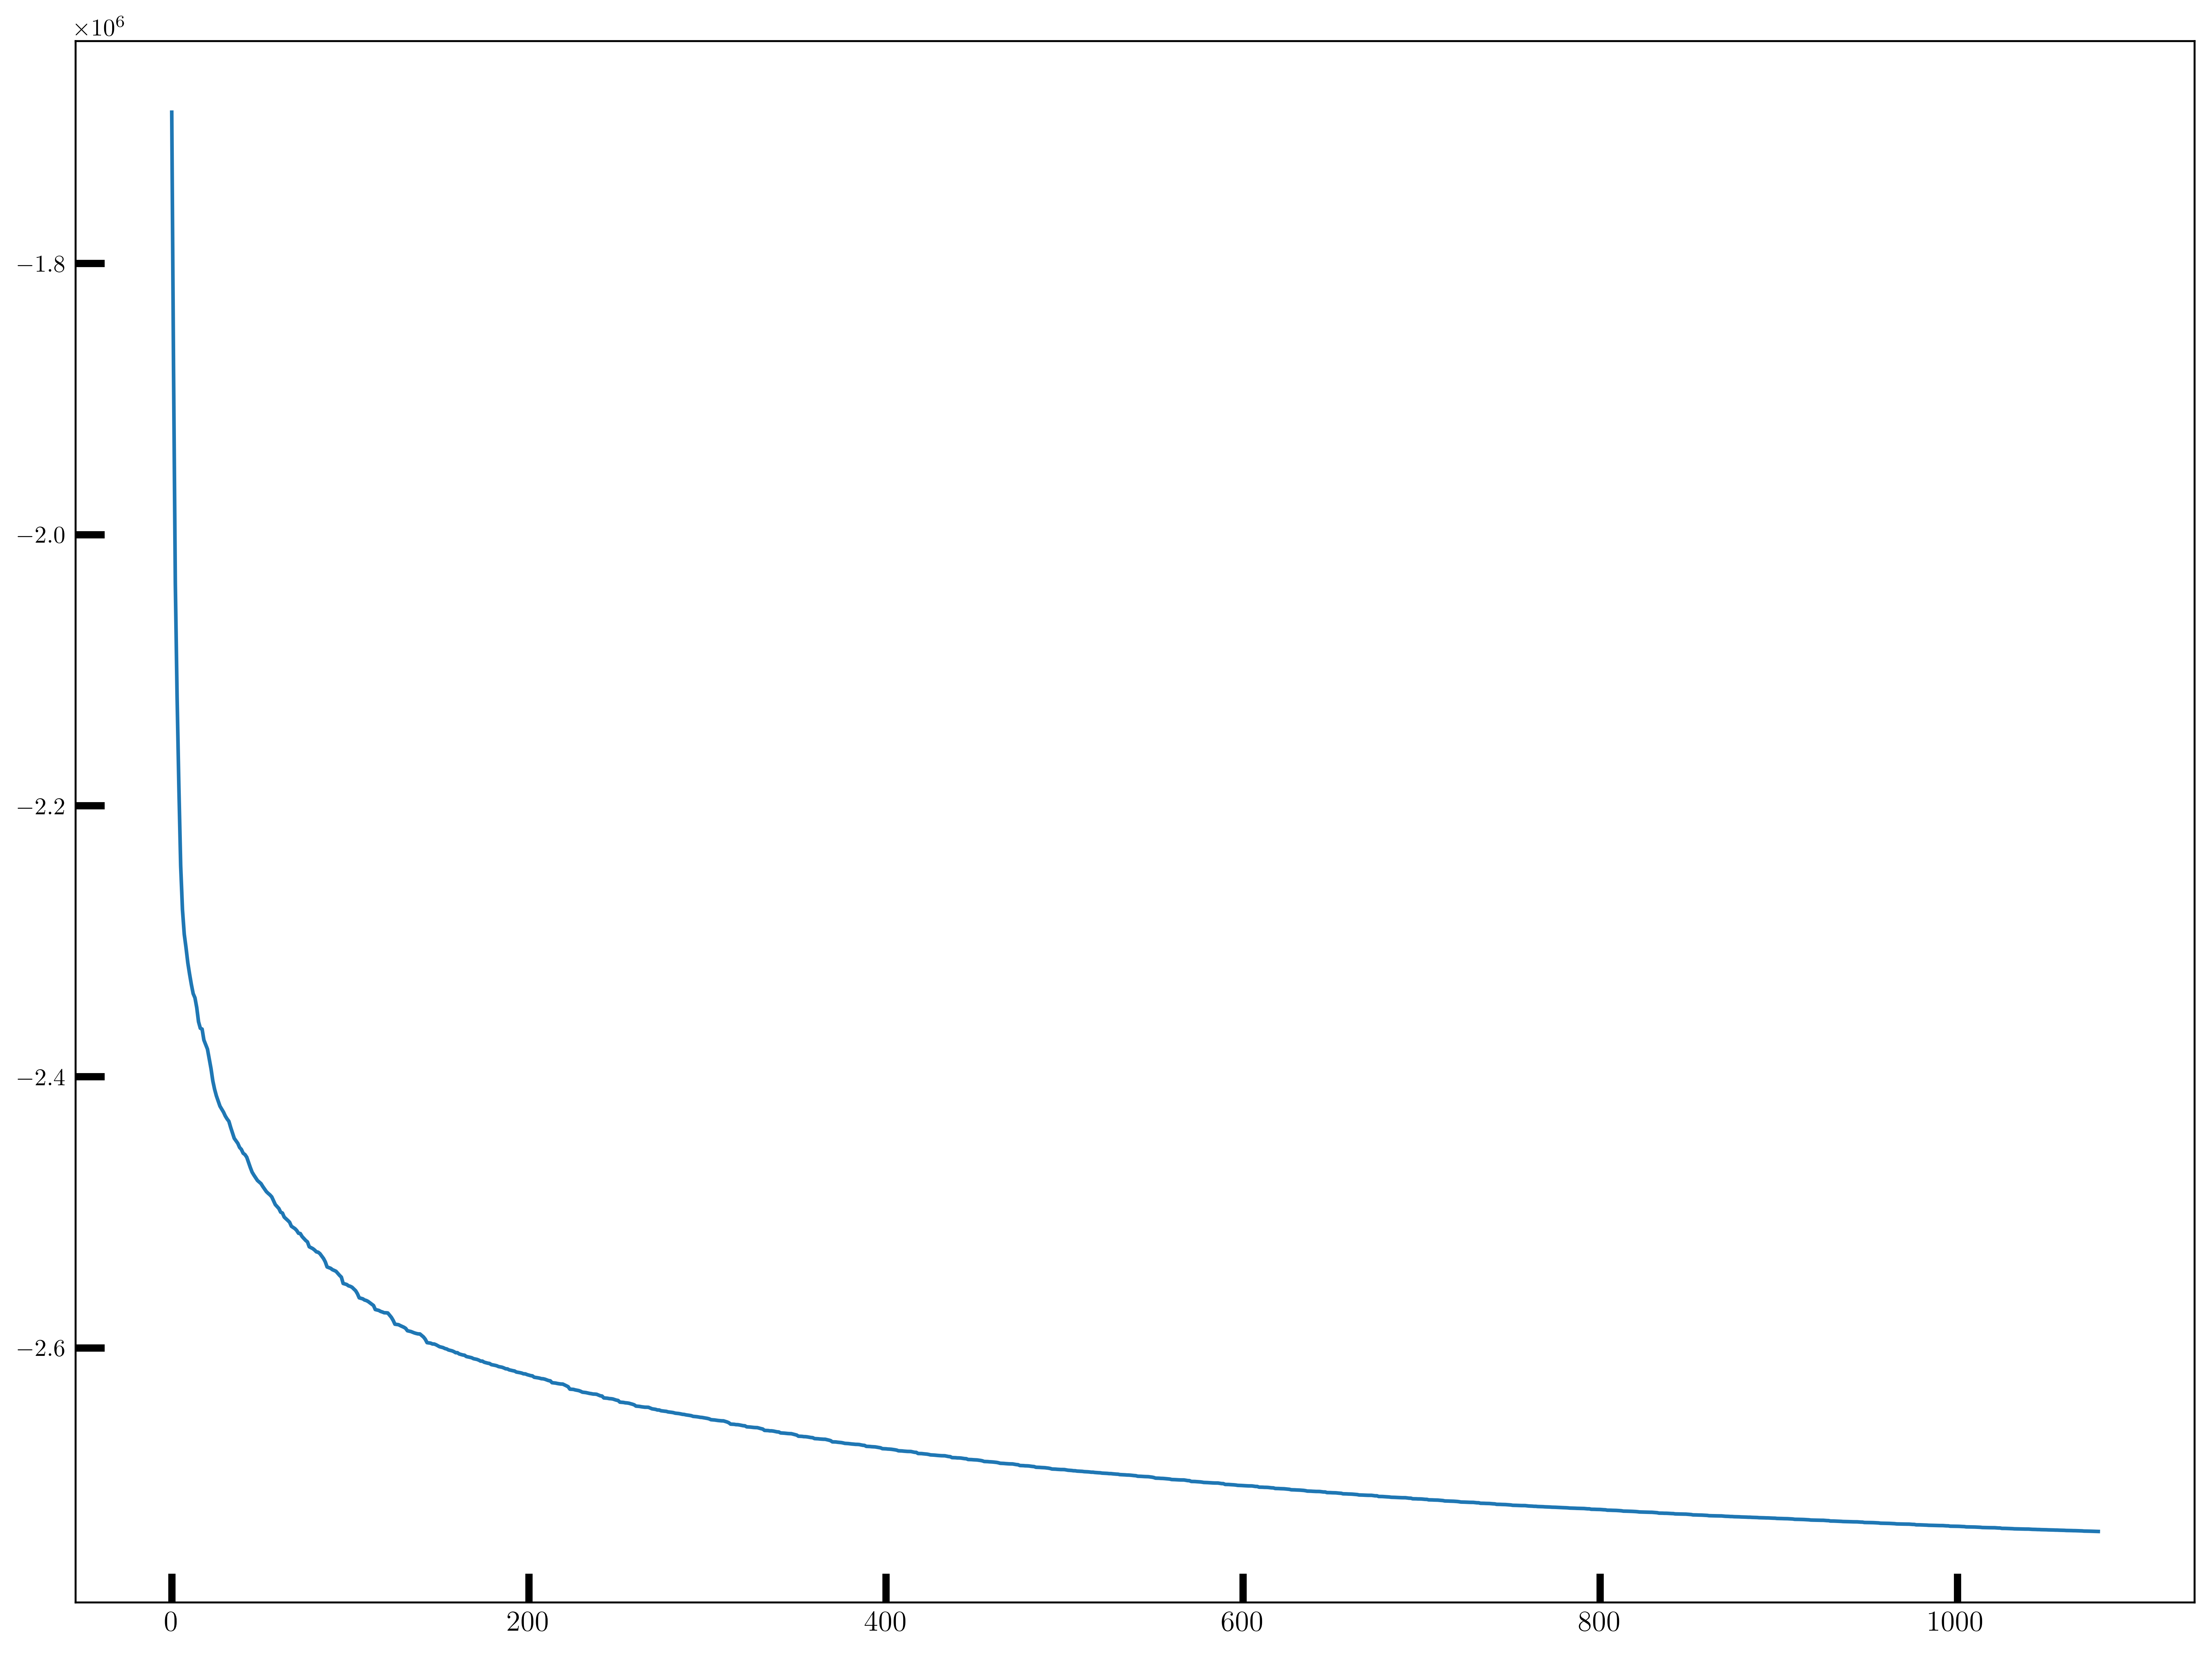

In [3]:
#Ligand
xvg_e = "Rolipram/potential.xvg"
x, e = np.loadtxt(xvg_e, comments=['#','@'], unpack=True)
plt.plot(x,e)

Text(0, 0.5, 'Temp (K)')

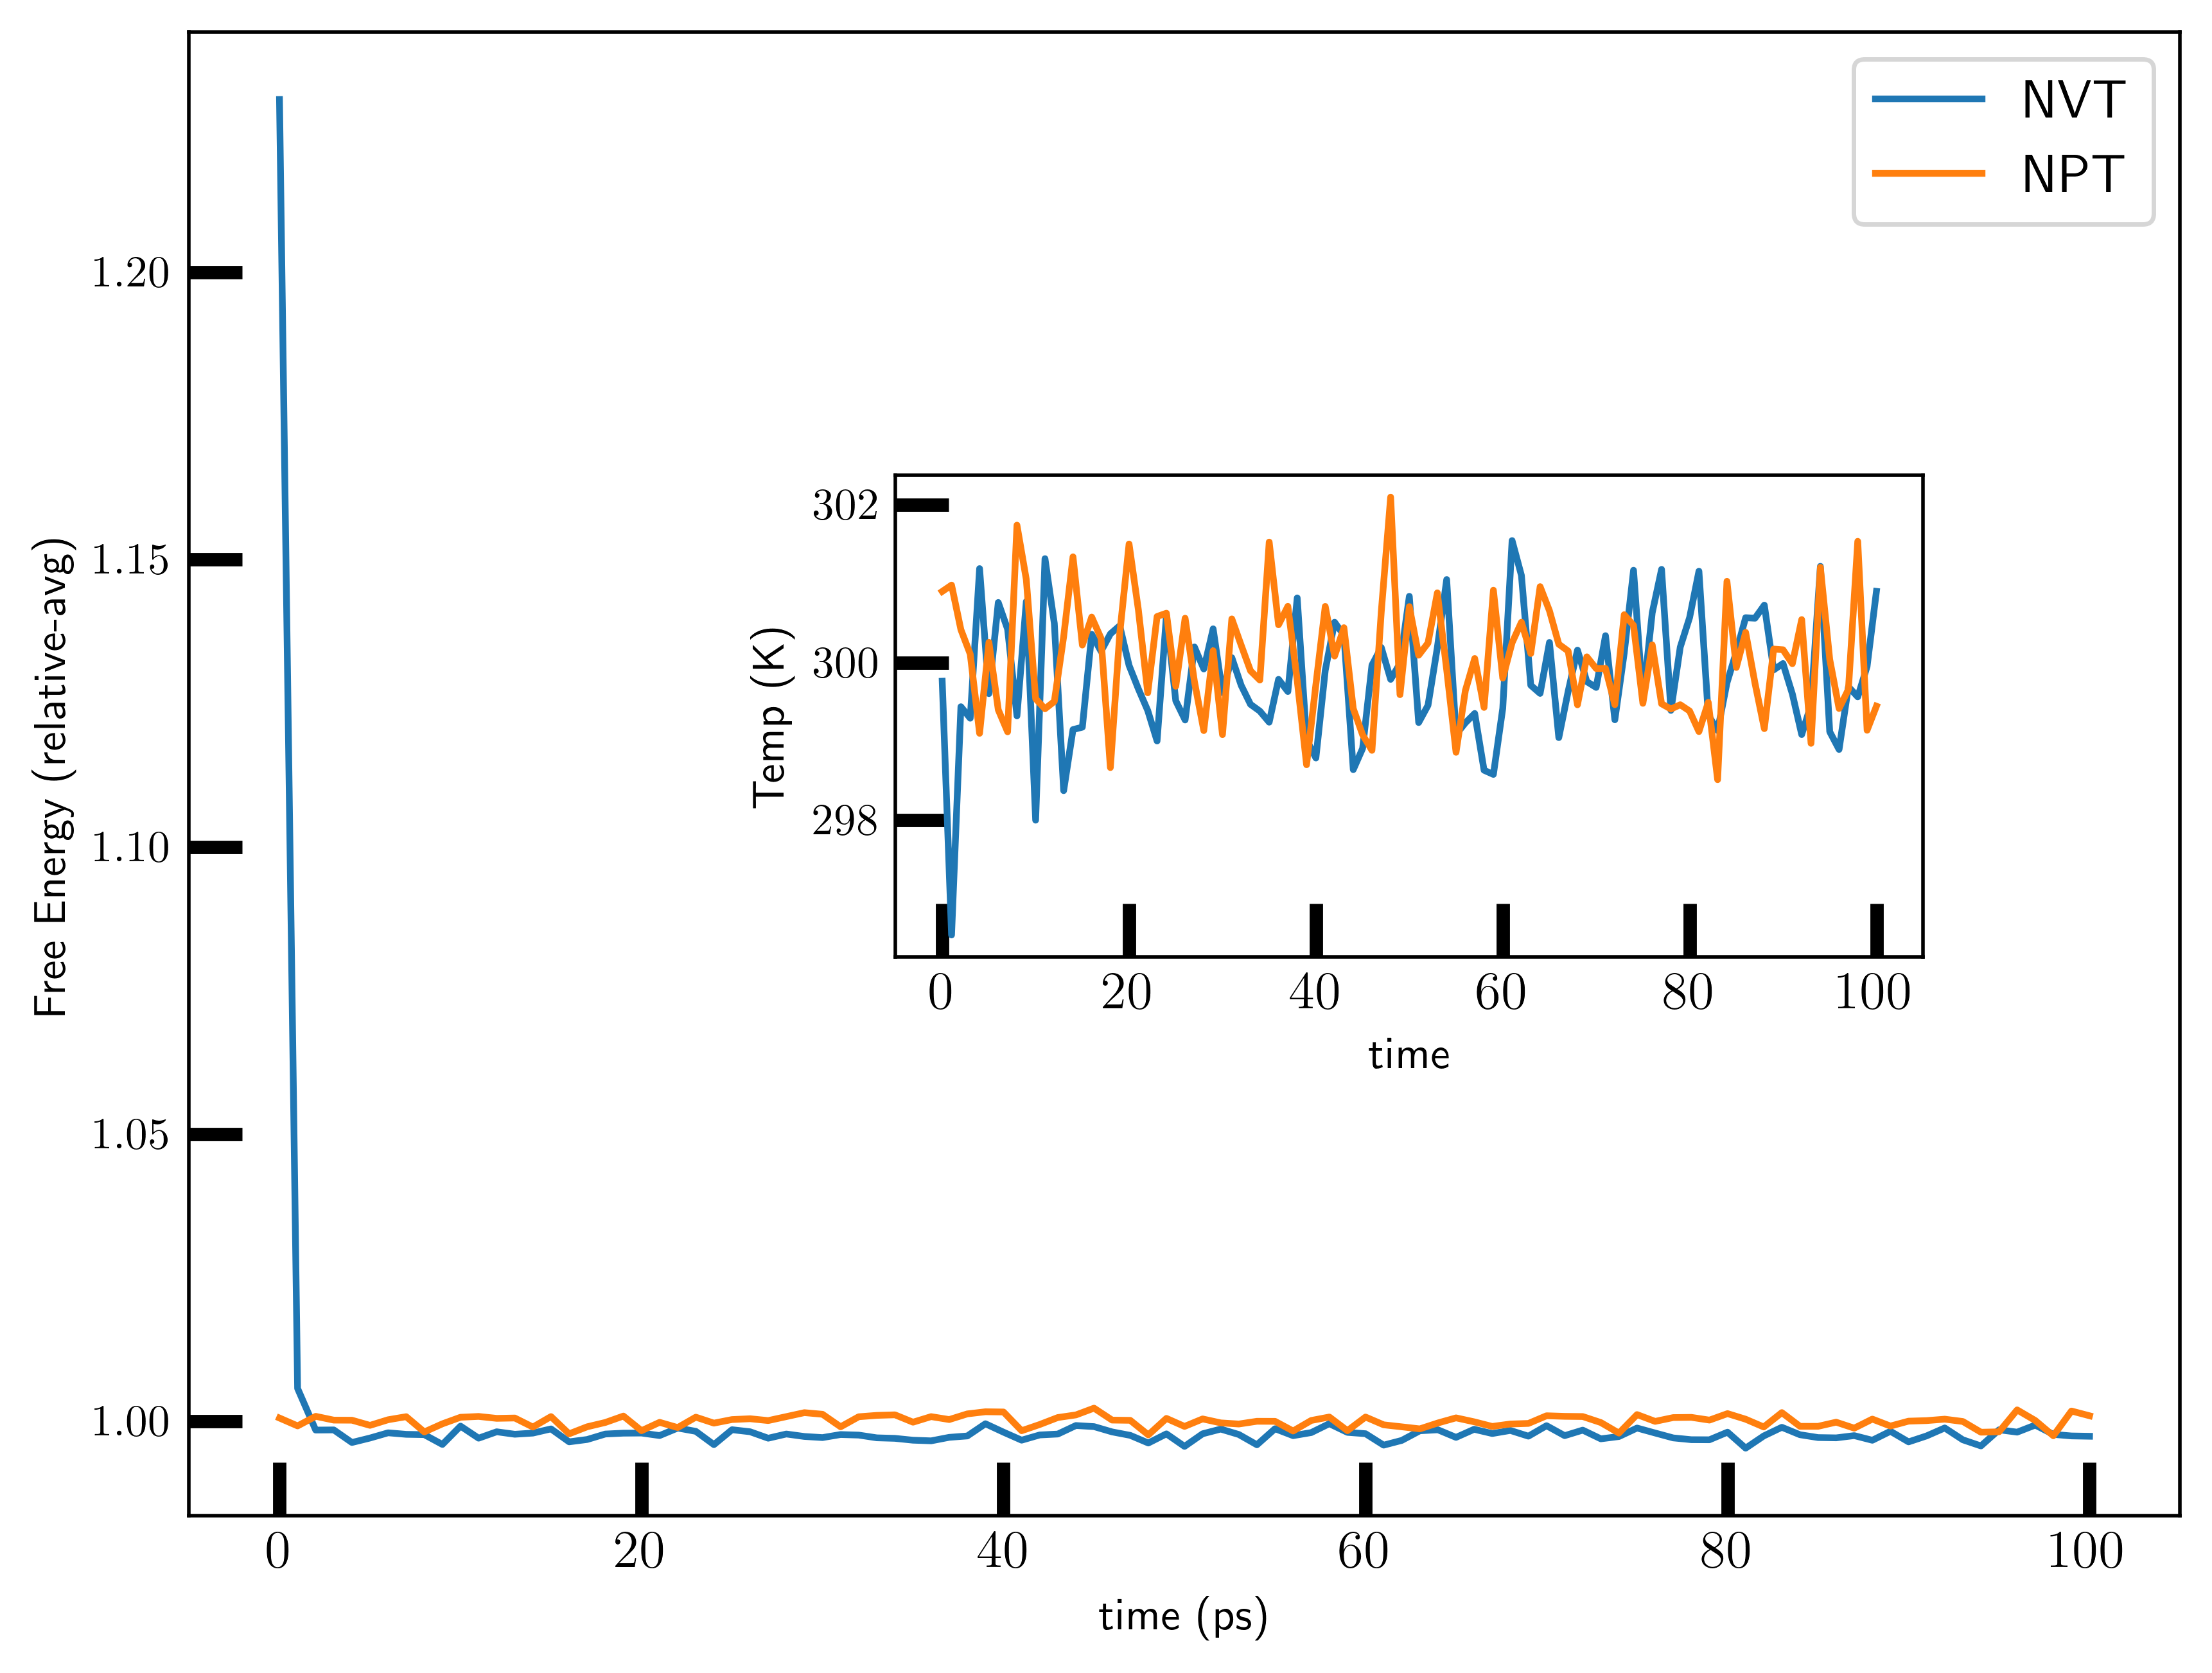

In [4]:
#Ligand
import matplotlib.pyplot as plt
import numpy as np

nvt_pfname = "Rolipram/nvt_pressure.xvg"  
nvt_tfname = "Rolipram/nvt_temperature.xvg"  
nvt_efname = "Rolipram/nvt_totalenergy.xvg"

t1, en = np.loadtxt(nvt_efname, comments=['#','@'], unpack=True)
en = en/np.average(en)

t2, tmp_nvt = np.loadtxt(nvt_tfname, comments=['#','@'], unpack=True)
t3, p = np.loadtxt(nvt_pfname, comments=['#','@'], unpack=True)

npt_rfname = "Rolipram/npt_density.xvg"  
npt_efname = "Rolipram/npt_enthalpy.xvg"  
npt_tfname = "Rolipram/npt_temperature.xvg"
t4, rho = np.loadtxt(npt_rfname, comments=['#','@'], unpack=True)
t5, enth = np.loadtxt(npt_efname, comments=['#','@'], unpack=True)
enth = enth/np.average(enth)
t6, tmp_npt = np.loadtxt(npt_tfname, comments=['#','@'], unpack=True)

fig, ax1 = plt.subplots(figsize=(8,6))
fig.set_tight_layout(False)

ax1.plot(t1, en, label='NVT')
ax1.plot(t5, enth, label='NPT')
ax1.set_xlabel('time (ps)')
ax1.set_ylabel('Free Energy (relative-avg)')
ax1.legend(loc='best')

left, bottom, width, height = [0.4, 0.4, 0.4, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(t2, tmp_nvt, label='NVT')
ax2.plot(t6, tmp_npt, label='NPT')

ax2.set_xlabel('time')
ax2.set_ylabel('Temp (K)')

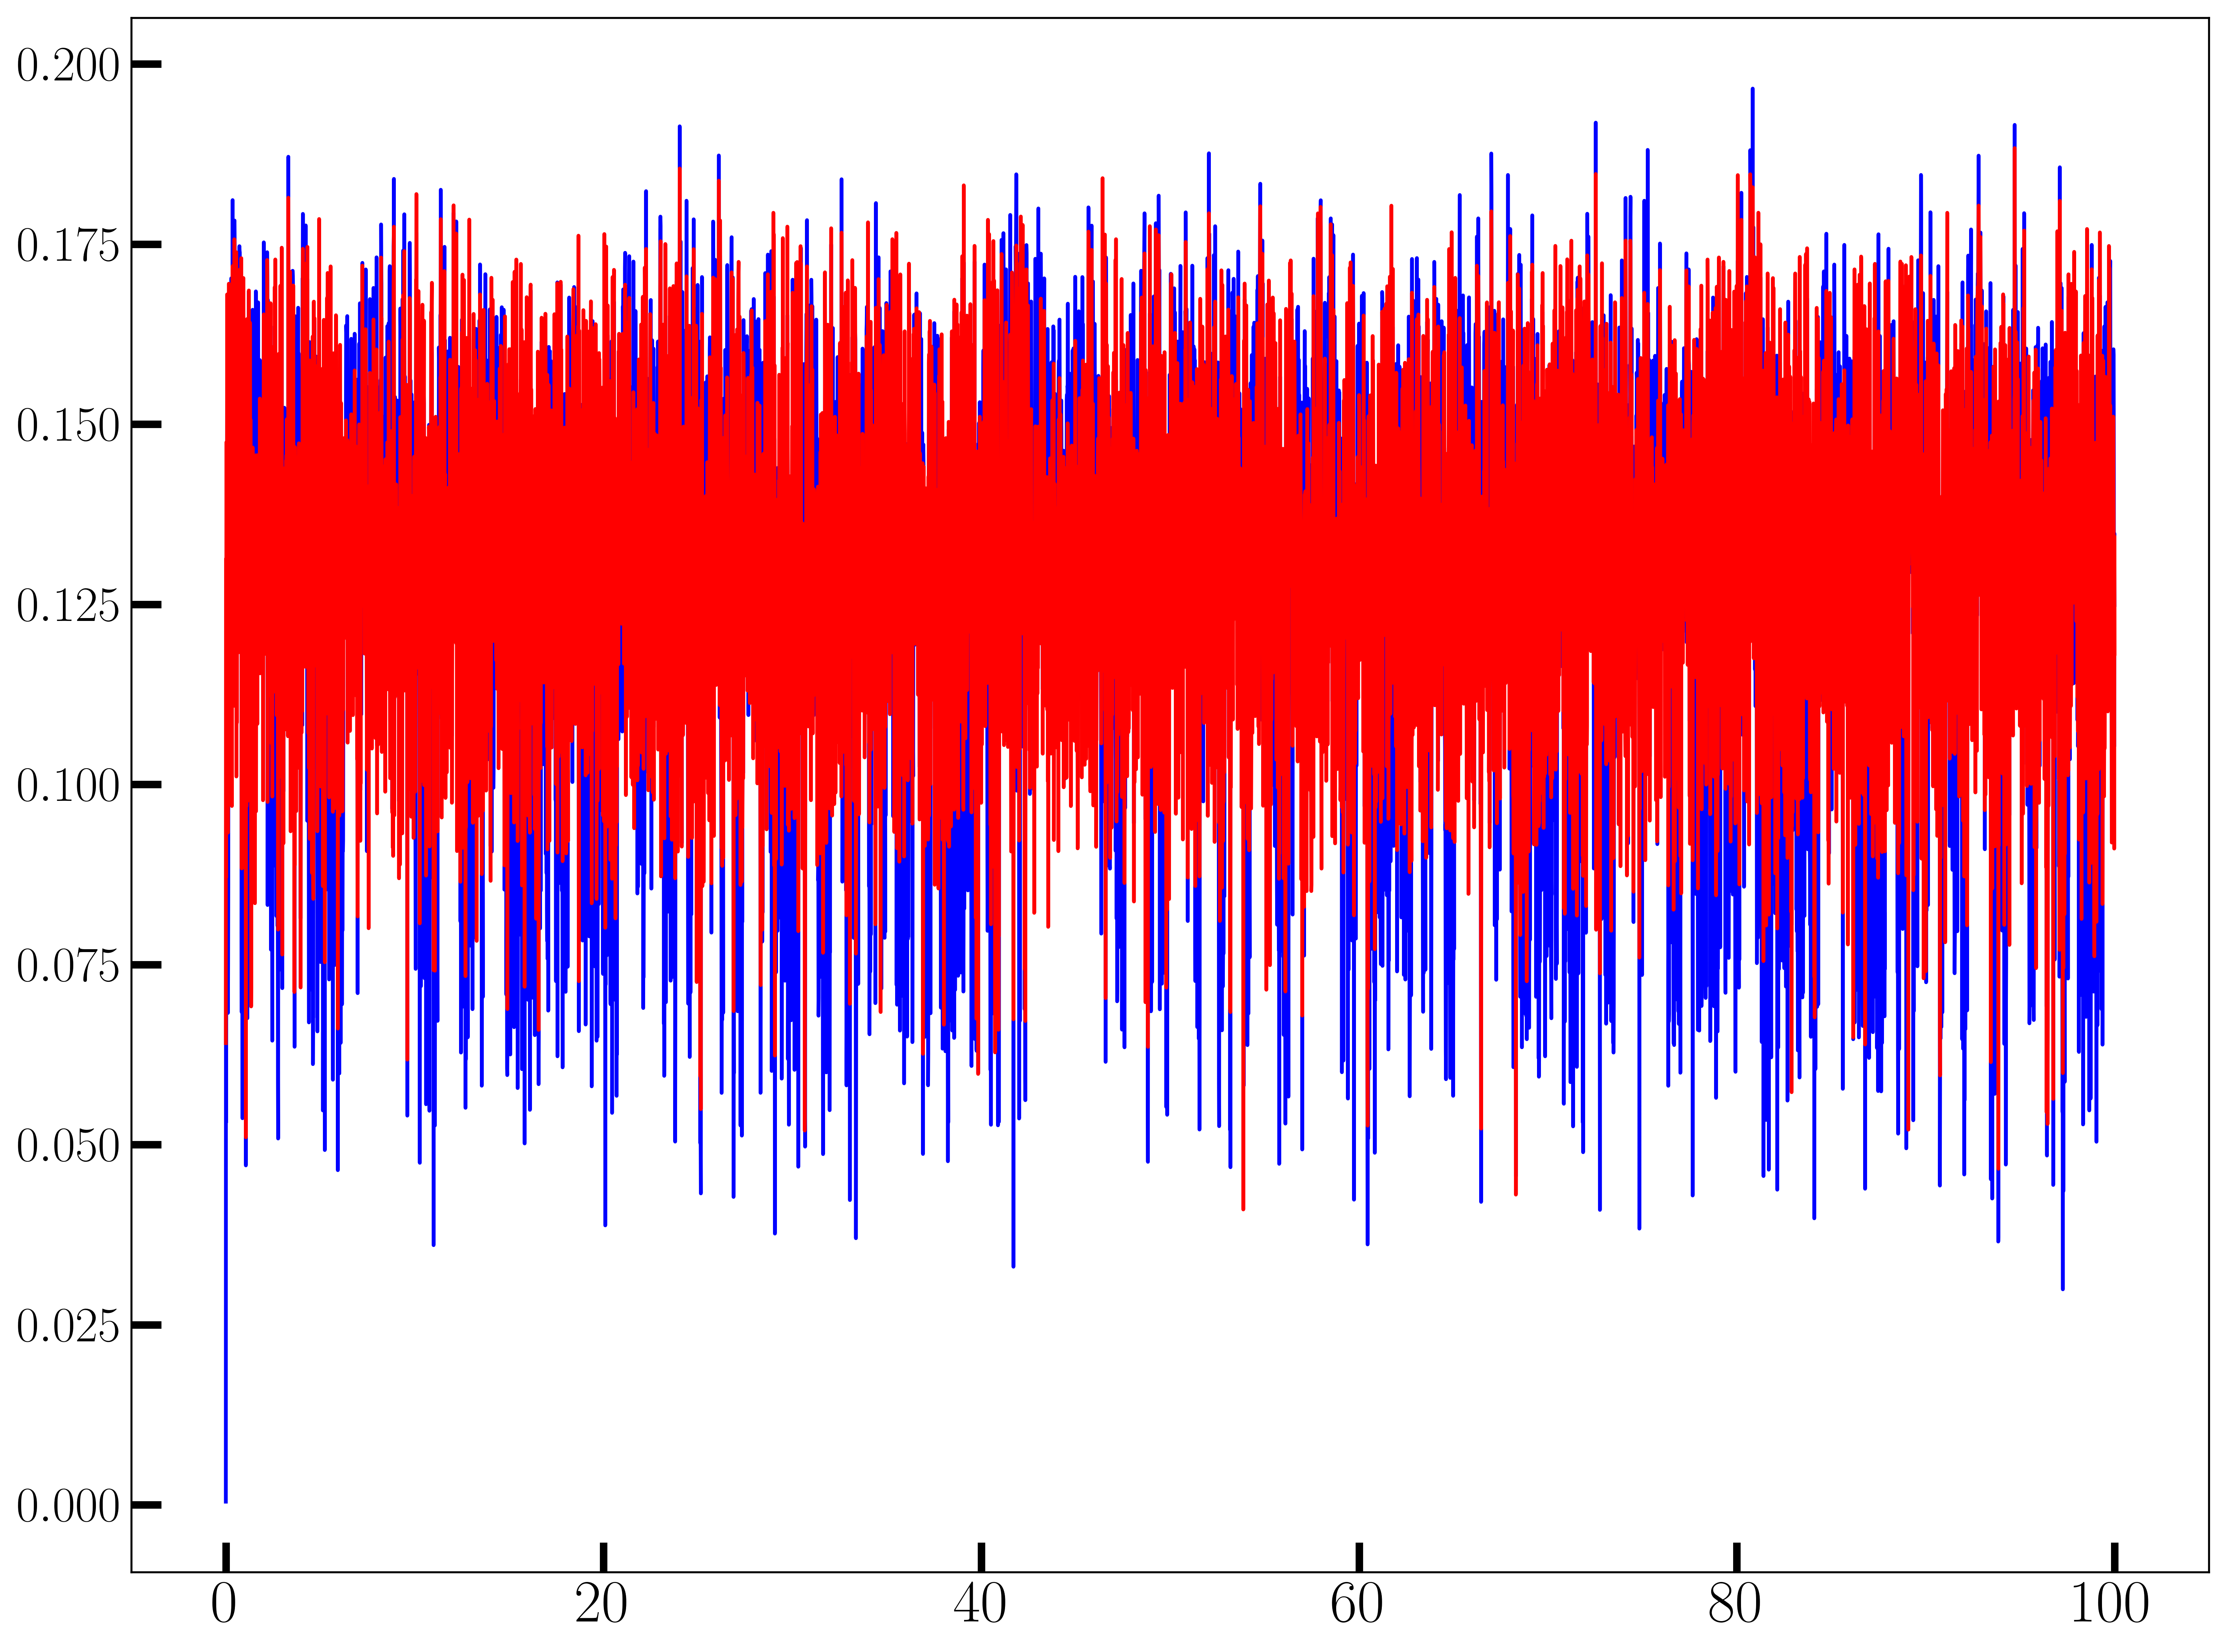

In [17]:
import matplotlib.pyplot as plt
import numpy as np
t1, rms = np.loadtxt(rol_rmsfname, comments=['#','@'], unpack=True)
t2,rms_xtal = np.loadtxt(rol_rmsxtalfname, comments=['#','@'], unpack=True)
plt.plot(t1,rms, color="blue", label="Rolipram")
plt.plot(t2,rms_xtal, color="red", label="Rolipram")